## Flight Price Prediction model based on Feb, 2022 Data

### Importing important Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer 
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Importing DataSet

In [69]:
df = pd.read_csv("C:/Users/Admin/Desktop/model/Recieved content of Fligh-Price-Prediction/Final_data.csv")  
df.shape

(2658, 13)

In [70]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [71]:
df.head(2)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1        Airline From   To  \
0           0             0               0         IndiGo  CCU  COK   
1           1             1               1  AirAsia India  CCU  COK   

  Journey_date Ticket Checking Date Duration Depenture_time Arival_time  \
0   22/02/2022           22/02/2022    3h 05          20:30       23:35   
1   22/02/2022           22/02/2022    4h 40          16:15       20:55   

          Stops    Price  
0     Direct\n   ₹ 7,959  
1  1 stop\n BLR  ₹ 7,951

In [72]:
# First of all, these initial columns are in no use, therefore, deleting these three columns
df.drop(columns = [ 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1' ], inplace = True)
df.head()

Airline From   To Journey_date Ticket Checking Date Duration  \
0         IndiGo  CCU  COK   22/02/2022           22/02/2022    3h 05   
1  AirAsia India  CCU  COK   22/02/2022           22/02/2022    4h 40   
2      Air India  CCU  COK   22/02/2022           22/02/2022   12h 10   
3         IndiGo  CCU  COK   22/02/2022           22/02/2022   10h 40   
4  AirAsia India  CCU  COK   22/02/2022           22/02/2022   11h 15   

  Depenture_time Arival_time               Stops    Price  
0          20:30       23:35           Direct\n   ₹ 7,959  
1          16:15       20:55        1 stop\n BLR  ₹ 7,951  
2          23:15     11:25+1  2 stops\n BLR, MYQ  ₹ 8,174  
3          23:20     10:00+1        1 stop\n HYD  ₹ 7,959  
4          19:45     07:00+1  2 stops\n BBI, BLR  ₹ 7,950

### Information about dataset

In [73]:
df.dtypes

Airline                 object
From                    object
To                      object
Journey_date            object
Ticket Checking Date    object
Duration                object
Depenture_time          object
Arival_time             object
Stops                   object
Price                   object
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               2658 non-null   object
 1   From                  2658 non-null   object
 2   To                    2658 non-null   object
 3   Journey_date          2658 non-null   object
 4   Ticket Checking Date  2658 non-null   object
 5   Duration              2658 non-null   object
 6   Depenture_time        2658 non-null   object
 7   Arival_time           2658 non-null   object
 8   Stops                 2658 non-null   object
 9   Price                 2658 non-null   object
dtypes: object(10)
memory usage: 207.8+ KB


In [75]:
# When I had scrapped data from website that time these columns type was of object type
# Initially, Every column is of object type.

### Removing Duplicates

In [76]:
df.drop_duplicates(inplace = True)
df.shape  # No, duplicacy present

(2658, 10)

### Removing null values of dataset

In [77]:
df.isnull().sum()

Airline                 0
From                    0
To                      0
Journey_date            0
Ticket Checking Date    0
Duration                0
Depenture_time          0
Arival_time             0
Stops                   0
Price                   0
dtype: int64

<AxesSubplot:>

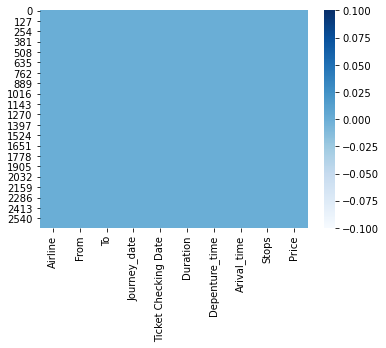

In [78]:
sns.heatmap(df.isnull() , cmap = 'Blues')

### Data Preprocessing

In [79]:
df['Journey_Day'] = pd.to_datetime(df['Journey_date'], format = '%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Journey_date'], format = '%d/%m/%Y').dt.month
df.head(2)

Airline From   To Journey_date Ticket Checking Date Duration  \
0         IndiGo  CCU  COK   22/02/2022           22/02/2022    3h 05   
1  AirAsia India  CCU  COK   22/02/2022           22/02/2022    4h 40   

  Depenture_time Arival_time         Stops    Price  Journey_Day  \
0          20:30       23:35     Direct\n   ₹ 7,959           22   
1          16:15       20:55  1 stop\n BLR  ₹ 7,951           22   

   Journey_Month  
0              2  
1              2

In [80]:
df['Dep_Hour'] = pd.to_datetime(df['Depenture_time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Depenture_time']).dt.minute

In [81]:
df['Arival_Hour'] = pd.to_datetime(df['Arival_time'], utc =  True).dt.hour
df['Arival_min'] = pd.to_datetime(df['Arival_time'], utc =  True).dt.hour

In [82]:
df['Diff. in Day (Journey - Booking)']=  pd.to_datetime(df['Journey_date'], format = '%d/%m/%Y') - pd.to_datetime(df['Ticket Checking Date'], format = '%d/%m/%Y')

In [83]:
duration_lst = list(df["Duration"])

for i in range(len(duration_lst)):
    if len(duration_lst[i].split()) < 2:    
        if 'h' in duration_lst[i]:
            duration_lst[i] = duration_lst[i].strip() + " 0m"  
        else:
            duration_lst[i] = "0h " + duration_lst[i] 

duration_hours = []
duration_minutes = []

for i in duration_lst:
    duration_hours.append( int(i.split(' ')[0].replace('h', '')))   
    duration_minutes.append(int(i.split(' ')[1].replace('m', '')))  

In [84]:
df['Duration_Hours'] = duration_hours
df['Duration_min.'] = duration_minutes

In [85]:
df['Total_Duration (in min)'] = df['Duration_Hours'] * 60 + df['Duration_min.']

In [86]:
df.drop(columns = ['Duration_Hours', 'Duration_min.'], inplace = True)

In [87]:
# Number of Stops Columns

In [88]:
df['No. of Stops'] = df['Stops'].apply(lambda x : x.split('\n')[0])

In [89]:
# Dealing with Price Column

In [90]:
df['Price'] = df['Price'].apply (lambda x: x.replace(' ', '').replace('₹', '').replace(',',''))

In [91]:
df['Price'] = df['Price'].astype('int64')

In [92]:
df.dtypes

Airline                                      object
From                                         object
To                                           object
Journey_date                                 object
Ticket Checking Date                         object
Duration                                     object
Depenture_time                               object
Arival_time                                  object
Stops                                        object
Price                                         int64
Journey_Day                                   int64
Journey_Month                                 int64
Dep_Hour                                      int64
Dep_min                                       int64
Arival_Hour                                   int64
Arival_min                                    int64
Diff. in Day (Journey - Booking)    timedelta64[ns]
Total_Duration (in min)                       int64
No. of Stops                                 object
dtype: objec

In [93]:
df.head()

Airline From   To Journey_date Ticket Checking Date Duration  \
0         IndiGo  CCU  COK   22/02/2022           22/02/2022    3h 05   
1  AirAsia India  CCU  COK   22/02/2022           22/02/2022    4h 40   
2      Air India  CCU  COK   22/02/2022           22/02/2022   12h 10   
3         IndiGo  CCU  COK   22/02/2022           22/02/2022   10h 40   
4  AirAsia India  CCU  COK   22/02/2022           22/02/2022   11h 15   

  Depenture_time Arival_time               Stops  Price  Journey_Day  \
0          20:30       23:35           Direct\n    7959           22   
1          16:15       20:55        1 stop\n BLR   7951           22   
2          23:15     11:25+1  2 stops\n BLR, MYQ   8174           22   
3          23:20     10:00+1        1 stop\n HYD   7959           22   
4          19:45     07:00+1  2 stops\n BBI, BLR   7950           22   

   Journey_Month  Dep_Hour  Dep_min  Arival_Hour  Arival_min  \
0              2        20       30           23          23   
1              2        16       15           20          20   
2              2        23       15           10          10   
3              2        23       20            9           9   
4              2        19       45            6           6   

  Diff. in Day (Journey - Booking)  Total_Duration (in min) No. of Stops  
0                           0 days                      185       Direct  
1                           0 days                      280       1 stop  
2                           0 days                      730      2 stops  
3                           0 days                      640       1 stop  
4                           0 days                      675      2 stops

In [94]:
# Deleting Un-necessary Columns

In [95]:
df.drop(columns = ['Journey_date', 'Ticket Checking Date', 'Duration', 'Depenture_time', 'Arival_time',
                   'Stops' ], inplace = True )    
df.head()

Airline From   To  Price  Journey_Day  Journey_Month  Dep_Hour  \
0         IndiGo  CCU  COK   7959           22              2        20   
1  AirAsia India  CCU  COK   7951           22              2        16   
2      Air India  CCU  COK   8174           22              2        23   
3         IndiGo  CCU  COK   7959           22              2        23   
4  AirAsia India  CCU  COK   7950           22              2        19   

   Dep_min  Arival_Hour  Arival_min Diff. in Day (Journey - Booking)  \
0       30           23          23                           0 days   
1       15           20          20                           0 days   
2       15           10          10                           0 days   
3       20            9           9                           0 days   
4       45            6           6                           0 days   

   Total_Duration (in min) No. of Stops  
0                      185       Direct  
1                      280       1 stop  
2                      730      2 stops  
3                      640       1 stop  
4                      675      2 stops

In [96]:
# for training dataset
departure = []
for i in df['Dep_Hour']:
    if i in range (0, 4):
        departure.append('Late Night')
    elif i in range (4, 8):
        departure.append('Early Morning')  
    elif i in range(8,12):
        departure.append('Morning')  
    elif i in range(12, 16):
        departure.append('After Noon')
    elif i in range(16, 20):
        departure.append('Evening') 
    elif i in range(20, 24):
        departure.append('Night')
print(len(departure))
df['Departure'] = departure

2658


In [97]:
df['Dep_Hour'].value_counts()

7     210
9     196
17    192
5     188
16    170
21    166
20    161
12    148
6     147
10    142
19    134
11    122
8     121
15    118
18    111
14    104
13     68
4      53
22     48
23     27
2      24
3       6
1       2
Name: Dep_Hour, dtype: int64

In [98]:
df['Arival_Hour'].value_counts()

23    332
19    224
22    201
20    190
8     173
16    161
18    154
21    140
17    123
10    109
7     107
13    104
6     100
14     88
11     88
15     83
12     80
0      79
9      68
5      20
1      12
4      11
3       6
2       5
Name: Arival_Hour, dtype: int64

In [99]:
# for training dataset
arrival = []
for i in df['Arival_Hour']:
    if i in range (0, 4):
        arrival.append('Late Night')        
    elif i in range (4, 8):
        arrival.append('Early Morning')       
    elif i in range(8,12):
        arrival.append('Morning')   
    elif i in range(12, 16):
        arrival.append('After Noon')  
    elif i in range(16, 20):
        arrival.append('Evening')    
    elif i in range(20, 24):
        arrival.append('Night')
print(len(arrival))
df['Arival'] = arrival

2658


In [100]:
df.head()

Airline From   To  Price  Journey_Day  Journey_Month  Dep_Hour  \
0         IndiGo  CCU  COK   7959           22              2        20   
1  AirAsia India  CCU  COK   7951           22              2        16   
2      Air India  CCU  COK   8174           22              2        23   
3         IndiGo  CCU  COK   7959           22              2        23   
4  AirAsia India  CCU  COK   7950           22              2        19   

   Dep_min  Arival_Hour  Arival_min Diff. in Day (Journey - Booking)  \
0       30           23          23                           0 days   
1       15           20          20                           0 days   
2       15           10          10                           0 days   
3       20            9           9                           0 days   
4       45            6           6                           0 days   

   Total_Duration (in min) No. of Stops Departure         Arival  
0                      185       Direct     Night          Night  
1                      280       1 stop   Evening          Night  
2                      730      2 stops     Night        Morning  
3                      640       1 stop     Night        Morning  
4                      675      2 stops   Evening  Early Morning

In [101]:
# df['Price (Target)'] = df['Price']
# df.drop(columns= ['Price'], inplace = True)
# df.head()

In [102]:
# Working with Diff. in Day (Journey - Booking)

In [103]:
df['Diff. in Day (Journey - Booking)'] = df['Diff. in Day (Journey - Booking)'].astype(str)

In [104]:
df.dtypes

Airline                             object
From                                object
To                                  object
Price                                int64
Journey_Day                          int64
Journey_Month                        int64
Dep_Hour                             int64
Dep_min                              int64
Arival_Hour                          int64
Arival_min                           int64
Diff. in Day (Journey - Booking)    object
Total_Duration (in min)              int64
No. of Stops                        object
Departure                           object
Arival                              object
dtype: object

In [105]:
df['Diff. in Day (Journey - Booking)'] = df['Diff. in Day (Journey - Booking)'].apply(lambda x: x.split(' ')[0] )
df.head()

Airline From   To  Price  Journey_Day  Journey_Month  Dep_Hour  \
0         IndiGo  CCU  COK   7959           22              2        20   
1  AirAsia India  CCU  COK   7951           22              2        16   
2      Air India  CCU  COK   8174           22              2        23   
3         IndiGo  CCU  COK   7959           22              2        23   
4  AirAsia India  CCU  COK   7950           22              2        19   

   Dep_min  Arival_Hour  Arival_min Diff. in Day (Journey - Booking)  \
0       30           23          23                                0   
1       15           20          20                                0   
2       15           10          10                                0   
3       20            9           9                                0   
4       45            6           6                                0   

   Total_Duration (in min) No. of Stops Departure         Arival  
0                      185       Direct     Night          Night  
1                      280       1 stop   Evening          Night  
2                      730      2 stops     Night        Morning  
3                      640       1 stop     Night        Morning  
4                      675      2 stops   Evening  Early Morning

In [106]:
df['Diff. in Day (Journey - Booking)'] = df['Diff. in Day (Journey - Booking)'].astype('int64')

In [107]:
df.dtypes

Airline                             object
From                                object
To                                  object
Price                                int64
Journey_Day                          int64
Journey_Month                        int64
Dep_Hour                             int64
Dep_min                              int64
Arival_Hour                          int64
Arival_min                           int64
Diff. in Day (Journey - Booking)     int64
Total_Duration (in min)              int64
No. of Stops                        object
Departure                           object
Arival                              object
dtype: object

In [108]:
df.head(2)

Airline From   To  Price  Journey_Day  Journey_Month  Dep_Hour  \
0         IndiGo  CCU  COK   7959           22              2        20   
1  AirAsia India  CCU  COK   7951           22              2        16   

   Dep_min  Arival_Hour  Arival_min  Diff. in Day (Journey - Booking)  \
0       30           23          23                                 0   
1       15           20          20                                 0   

   Total_Duration (in min) No. of Stops Departure Arival  
0                      185       Direct     Night  Night  
1                      280       1 stop   Evening  Night

In [109]:
df['Flight Price'] = df['Price'].astype('float64')
df.head(2)

Airline From   To  Price  Journey_Day  Journey_Month  Dep_Hour  \
0         IndiGo  CCU  COK   7959           22              2        20   
1  AirAsia India  CCU  COK   7951           22              2        16   

   Dep_min  Arival_Hour  Arival_min  Diff. in Day (Journey - Booking)  \
0       30           23          23                                 0   
1       15           20          20                                 0   

   Total_Duration (in min) No. of Stops Departure Arival  Flight Price  
0                      185       Direct     Night  Night        7959.0  
1                      280       1 stop   Evening  Night        7951.0

In [110]:
# df['Total_Duration (in min)'] = df['Total_Duration (in min)'].astype('float64')
df.drop(columns = ['Price'], inplace = True)

In [111]:
df.head(2)

Airline From   To  Journey_Day  Journey_Month  Dep_Hour  Dep_min  \
0         IndiGo  CCU  COK           22              2        20       30   
1  AirAsia India  CCU  COK           22              2        16       15   

   Arival_Hour  Arival_min  Diff. in Day (Journey - Booking)  \
0           23          23                                 0   
1           20          20                                 0   

   Total_Duration (in min) No. of Stops Departure Arival  Flight Price  
0                      185       Direct     Night  Night        7959.0  
1                      280       1 stop   Evening  Night        7951.0

In [112]:
df.dtypes

Airline                              object
From                                 object
To                                   object
Journey_Day                           int64
Journey_Month                         int64
Dep_Hour                              int64
Dep_min                               int64
Arival_Hour                           int64
Arival_min                            int64
Diff. in Day (Journey - Booking)      int64
Total_Duration (in min)               int64
No. of Stops                         object
Departure                            object
Arival                               object
Flight Price                        float64
dtype: object

## Visualization

#### For Object Type columns

In [113]:
object_col = list(df.select_dtypes(include = ['object']).keys())
print(object_col)

['Airline', 'From', 'To', 'No. of Stops', 'Departure', 'Arival']


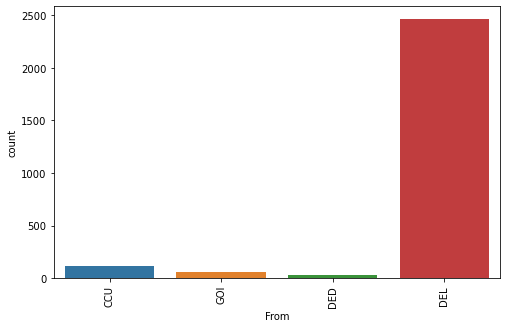

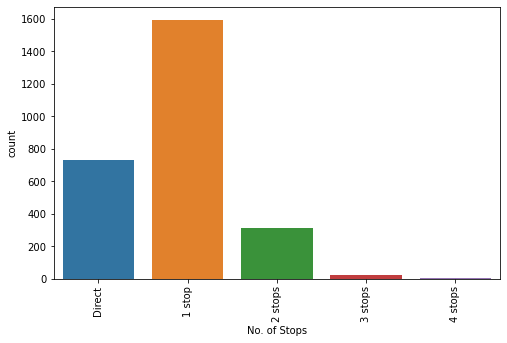

In [114]:
for i in object_col:
    l = list(df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.countplot(df[i])
    countplot.set_xticklabels(labels = l, rotation = 90)

In [115]:
# Pie Chart

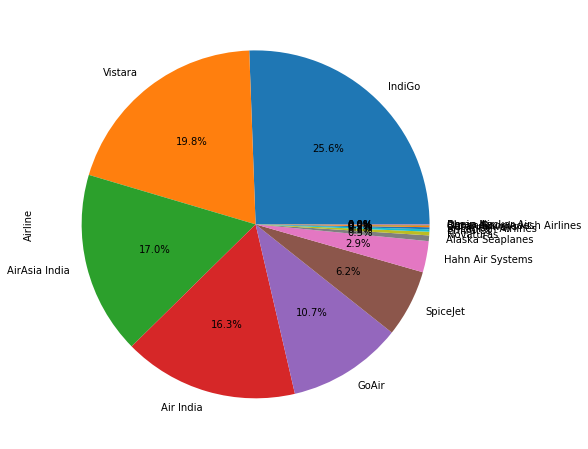

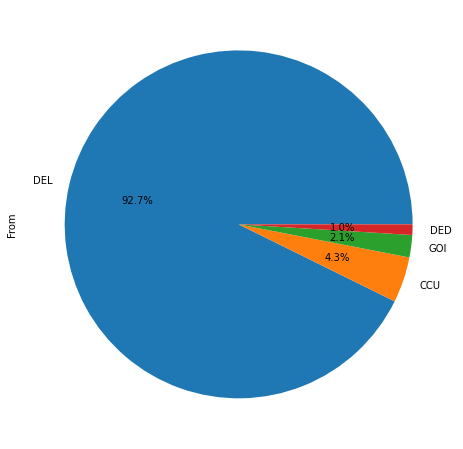

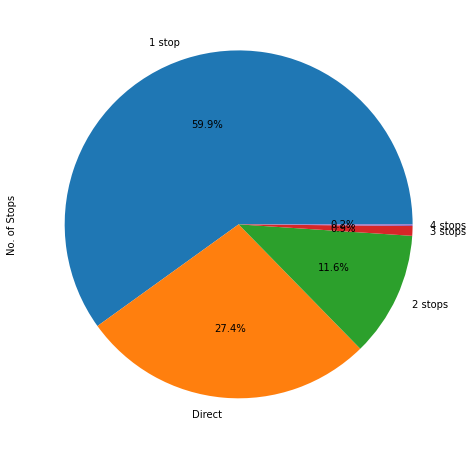

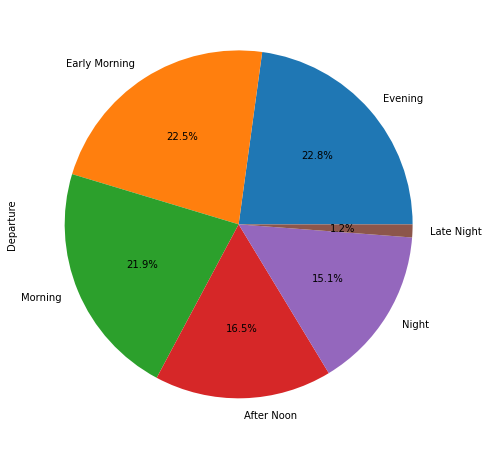

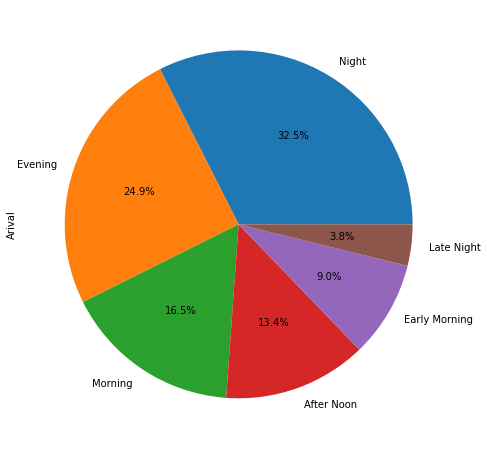

In [116]:
for i in object_col:
    
    plt.figure(figsize = (10, 8))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

#### For float type columns

In [117]:
# Kilometer
int_col = list(df.select_dtypes(include = ['int64', 'float64']).keys())
print(int_col)

['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_min', 'Arival_Hour', 'Arival_min', 'Diff. in Day (Journey - Booking)', 'Total_Duration (in min)', 'Flight Price']


### Checking outliers:

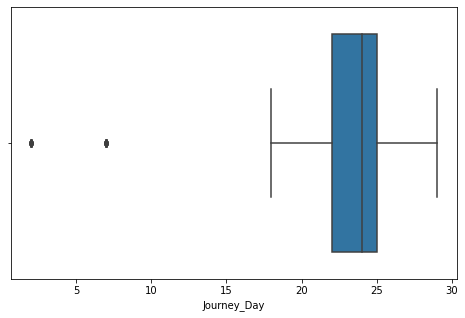

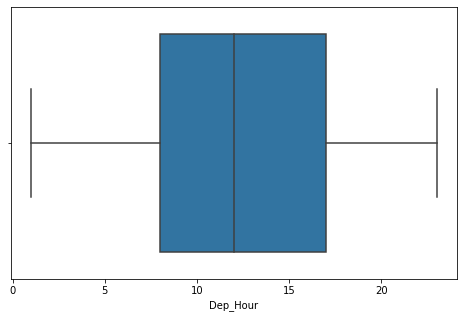

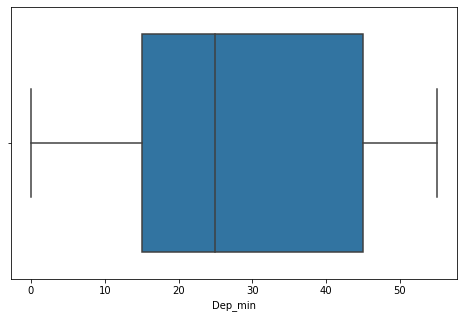

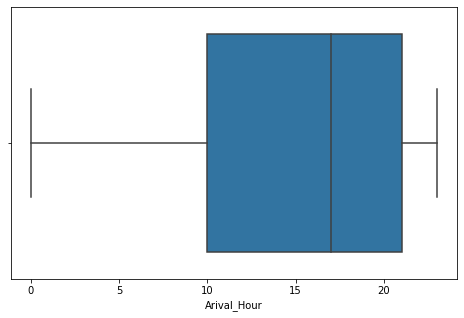

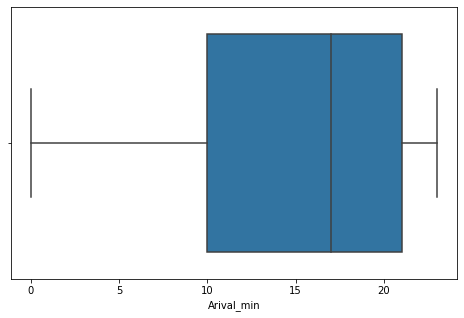

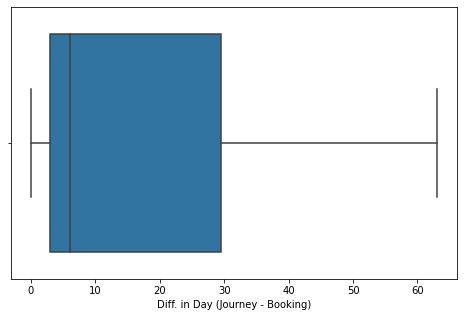

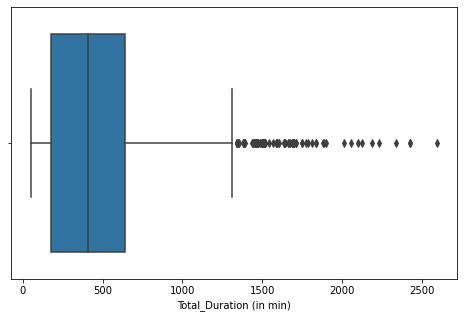

In [118]:
for i in int_col:
    plt.figure(figsize =  (8,5))
    sns.boxplot(df[i])

### Check Skewness

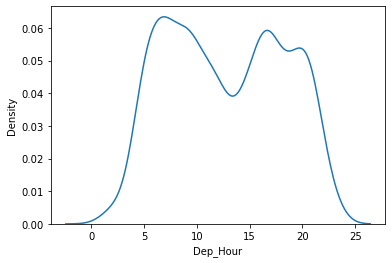

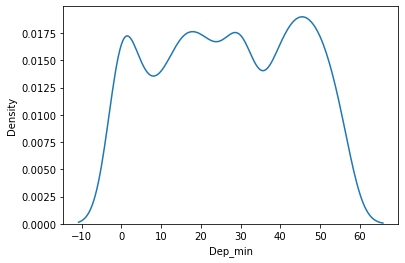

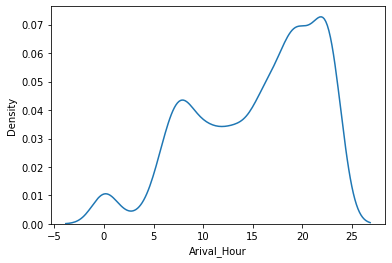

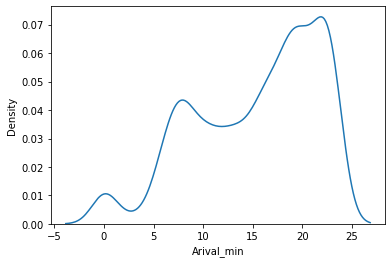

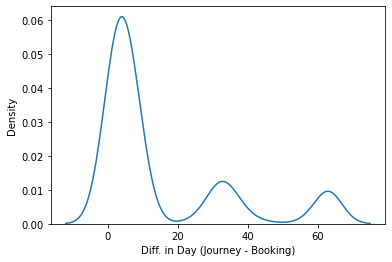

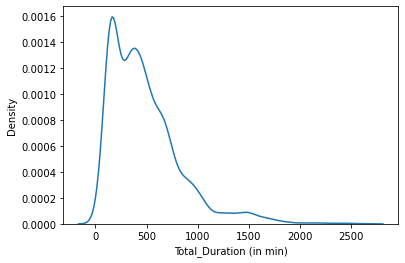

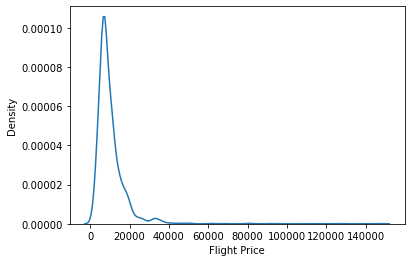

In [119]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], hist = False)

### Distribution of columns

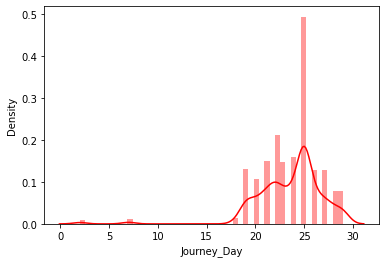

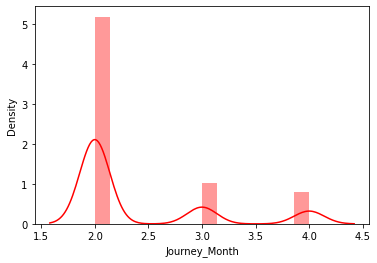

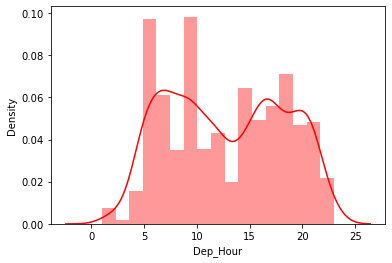

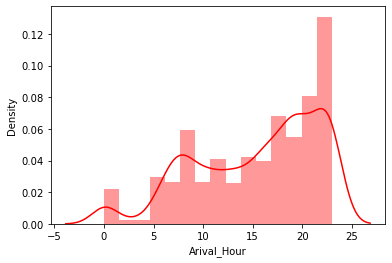

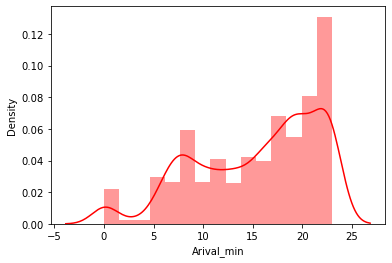

In [120]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [121]:
# ----

### Spread of float type columns

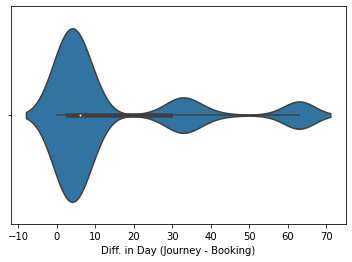

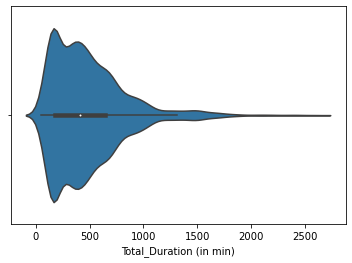

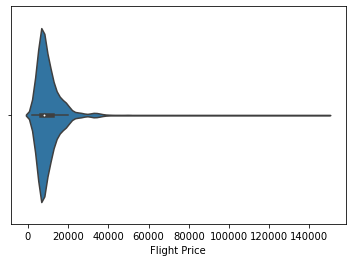

In [122]:
for i in int_col:
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [123]:
df.columns

Index(['Airline', 'From', 'To', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_min', 'Arival_Hour', 'Arival_min',
       'Diff. in Day (Journey - Booking)', 'Total_Duration (in min)',
       'No. of Stops', 'Departure', 'Arival', 'Flight Price'],
      dtype='object')

#### Pattern of Float type columns with each other

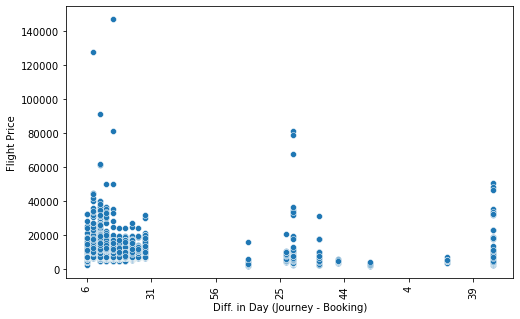

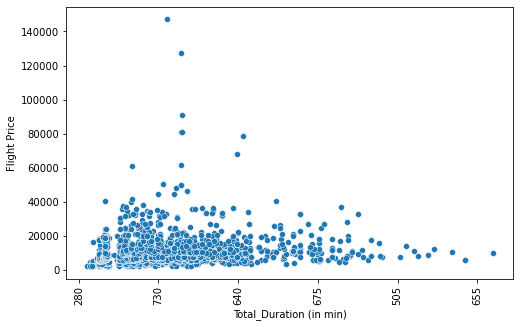

In [124]:
for i in ['Diff. in Day (Journey - Booking)', 'Total_Duration (in min)']:
    l = list(df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.scatterplot(df[i],df['Flight Price'] )
    countplot.set_xticklabels(labels = l, rotation = 90)

<AxesSubplot:xlabel='Diff. in Day (Journey - Booking)', ylabel='Flight Price'>

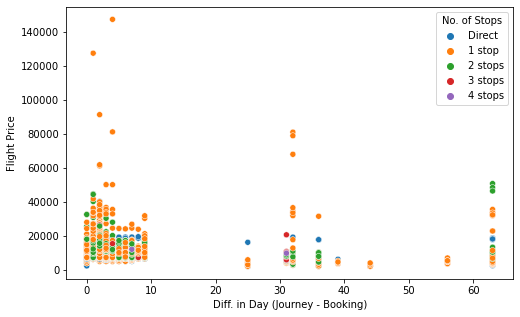

In [125]:
plt.figure(figsize = (8, 5))
sns.scatterplot(df['Diff. in Day (Journey - Booking)'], df['Flight Price'], hue = df['No. of Stops'])

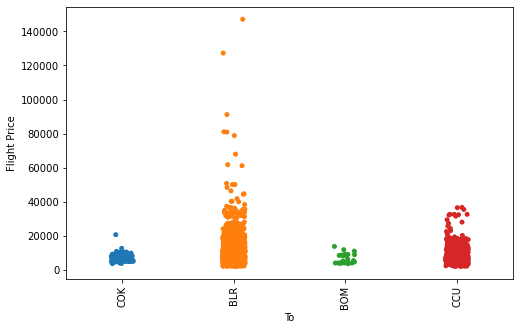

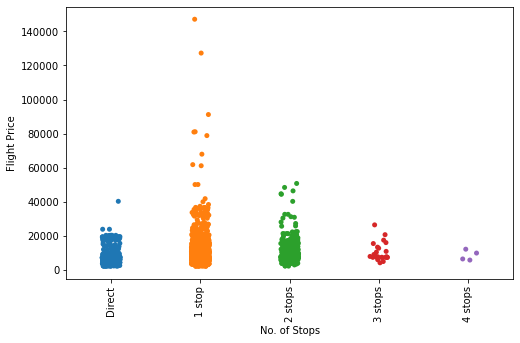

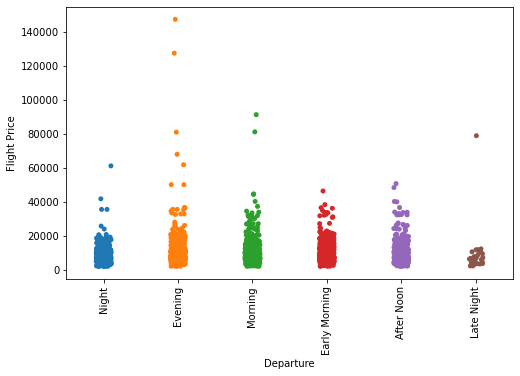

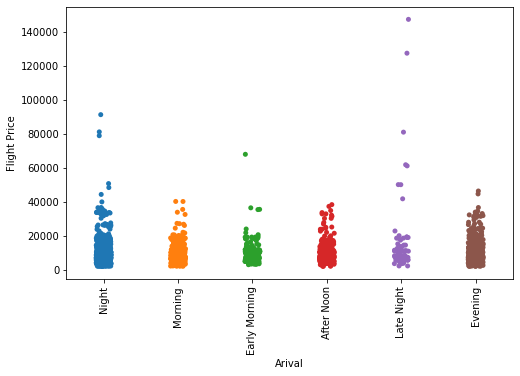

In [126]:
for i in object_col:
    l = list(df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.stripplot(df[i],df['Flight Price'] )
    countplot.set_xticklabels(labels = l, rotation = 90)

In [127]:
# Volvo car is having highest value, and maximum car is of Hundai, Maruti and etc.
df.columns

Index(['Airline', 'From', 'To', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_min', 'Arival_Hour', 'Arival_min',
       'Diff. in Day (Journey - Booking)', 'Total_Duration (in min)',
       'No. of Stops', 'Departure', 'Arival', 'Flight Price'],
      dtype='object')

In [128]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Total_Duration (in min)', y = 'Flight Price', data = df)
plt.show()

### Correlation of the columns

In [129]:
df.corr()

Journey_Day  Journey_Month  Dep_Hour  \
Journey_Day                          1.000000       0.038921 -0.048017   
Journey_Month                        0.038921       1.000000  0.011508   
Dep_Hour                            -0.048017       0.011508  1.000000   
Dep_min                             -0.070034      -0.005731  0.018154   
Arival_Hour                         -0.050969       0.006645  0.057355   
Arival_min                          -0.050969       0.006645  0.057355   
Diff. in Day (Journey - Booking)     0.192178       0.985052 -0.002616   
Total_Duration (in min)             -0.049823       0.003460  0.037448   
Flight Price                        -0.149245      -0.228223 -0.040183   

                                   Dep_min  Arival_Hour  Arival_min  \
Journey_Day                      -0.070034    -0.050969   -0.050969   
Journey_Month                    -0.005731     0.006645    0.006645   
Dep_Hour                          0.018154     0.057355    0.057355   
Dep_min                           1.000000     0.040621    0.040621   
Arival_Hour                       0.040621     1.000000    1.000000   
Arival_min                        0.040621     1.000000    1.000000   
Diff. in Day (Journey - Booking) -0.015887     0.002334    0.002334   
Total_Duration (in min)           0.016849    -0.088158   -0.088158   
Flight Price                     -0.005804    -0.026074   -0.026074   

                                  Diff. in Day (Journey - Booking)  \
Journey_Day                                               0.192178   
Journey_Month                                             0.985052   
Dep_Hour                                                 -0.002616   
Dep_min                                                  -0.015887   
Arival_Hour                                               0.002334   
Arival_min                                                0.002334   
Diff. in Day (Journey - Booking)                          1.000000   
Total_Duration (in min)                                  -0.005007   
Flight Price                                             -0.235994   

                                  Total_Duration (in min)  Flight Price  
Journey_Day                                     -0.049823     -0.149245  
Journey_Month                                    0.003460     -0.228223  
Dep_Hour                                         0.037448     -0.040183  
Dep_min                                          0.016849     -0.005804  
Arival_Hour                                     -0.088158     -0.026074  
Arival_min                                      -0.088158     -0.026074  
Diff. in Day (Journey - Booking)                -0.005007     -0.235994  
Total_Duration (in min)                          1.000000      0.163427  
Flight Price                                     0.163427      1.000000

<AxesSubplot:>

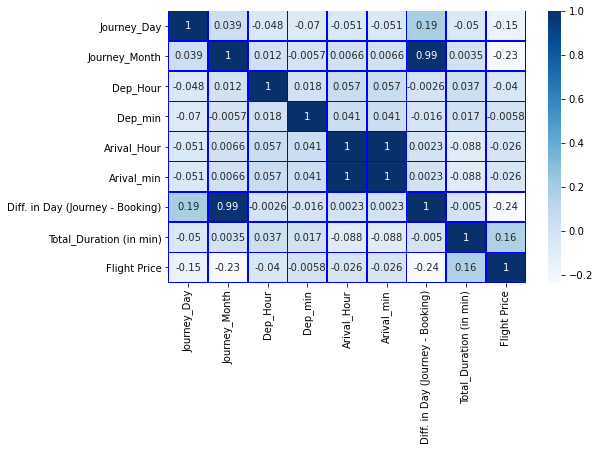

In [130]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [131]:
# plt.figure(figsize = (15, 10))
# df.corr()['Flight Price'].sort_values(ascending = False).drop(['Flight Price']).plot(kind = 'bar', color = 'black')
# plt.xlabel( 'Feature', fontsize = 18)
# plt.ylabel( 'Columns with target names', fontsize = 18)
# plt.title ('Correlation', fontsize = 18)
# plt.show()

### Describe Data

In [132]:
df.describe()

Journey_Day  Journey_Month     Dep_Hour      Dep_min  Arival_Hour  \
count  2658.000000    2658.000000  2658.000000  2658.000000  2658.000000   
mean     23.578254       2.372084    12.740030    26.809631    15.375847   
std       3.399297       0.677341     5.509541    17.423910     6.212021   
min       2.000000       2.000000     1.000000     0.000000     0.000000   
25%      22.000000       2.000000     8.000000    15.000000    10.000000   
50%      24.000000       2.000000    12.000000    25.000000    17.000000   
75%      25.000000       3.000000    17.000000    45.000000    21.000000   
max      29.000000       4.000000    23.000000    55.000000    23.000000   

        Arival_min  Diff. in Day (Journey - Booking)  Total_Duration (in min)  \
count  2658.000000                       2658.000000              2658.000000   
mean     15.375847                         14.661776               482.962378   
std       6.212021                         19.365188               347.388440   
min       0.000000                          0.000000                50.000000   
25%      10.000000                          3.000000               175.000000   
50%      17.000000                          6.000000               410.000000   
75%      21.000000                         29.500000               640.000000   
max      23.000000                         63.000000              2595.000000   

        Flight Price  
count    2658.000000  
mean    10218.670805  
std      7779.530411  
min      2154.000000  
25%      6355.250000  
50%      7740.000000  
75%     11776.000000  
max    147128.000000

<AxesSubplot:>

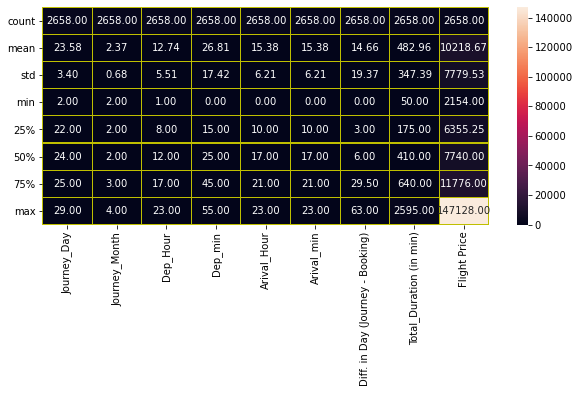

In [133]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [134]:
# Kilometer and Prize columns min and max value are having high difference, we can say these column are 
# highly spread

# Mean and 50 percentile value is having some value difference, mean these columns are having skewness
# Count for each column is same mean no null value present
# 25% and 75% is having difference , which also indicating , column spreadness 

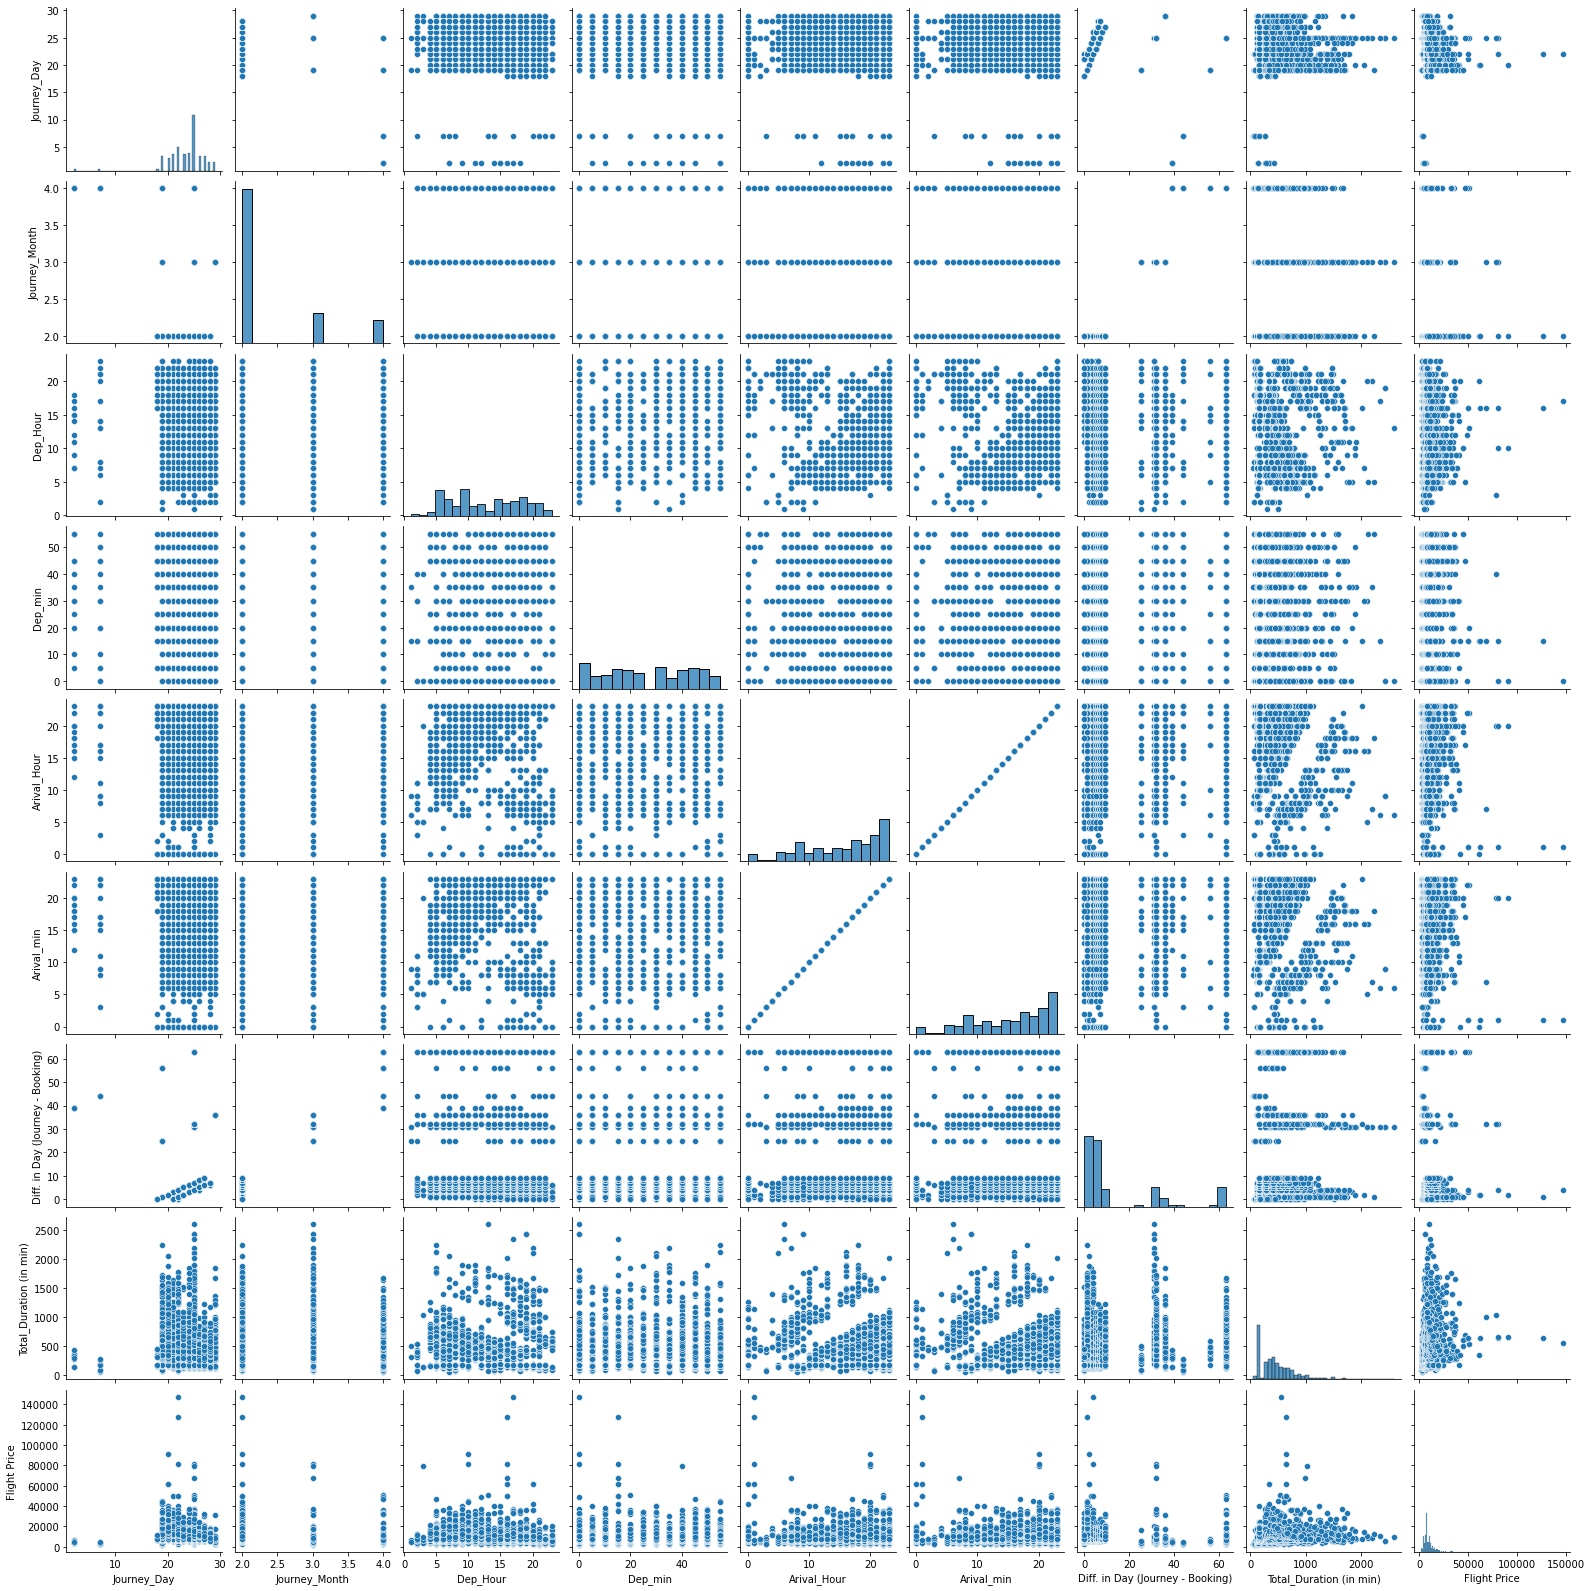

In [135]:
sns.pairplot(df)

##### OneHot Encoding 
 Encoder to the features

In [136]:

df['No. of Stops'] = df['No. of Stops'].replace({'1 stop' : 1, 'Direct': 0, '2 stops':2, '3 stops': 3, '4 stops' : 4})
df.dtypes

Airline                              object
From                                 object
To                                   object
Journey_Day                           int64
Journey_Month                         int64
Dep_Hour                              int64
Dep_min                               int64
Arival_Hour                           int64
Arival_min                            int64
Diff. in Day (Journey - Booking)      int64
Total_Duration (in min)               int64
No. of Stops                          int64
Departure                            object
Arival                               object
Flight Price                        float64
dtype: object

In [137]:
obj = df.select_dtypes(include = ['object']).keys()
obj

Index(['Airline', 'From', 'To', 'Departure', 'Arival'], dtype='object')

In [138]:
# for loop to give value counts for each objec type columns
for i in obj:
    print('---------------------- ', i, ' ---------------------')
    print(df[i].value_counts())

----------------------  Airline  ---------------------
IndiGo                       680
Vistara                      527
AirAsia India                451
Air India                    432
GoAir                        284
SpiceJet                     166
Hahn Air Systems              77
Alaska Seaplanes              14
Novaturas                      9
Emirates                       6
SriLankan Airlines             5
Qatar Airways                  4
Biman Bangladesh Airlines      1
Rhein-Neckar Air               1
Oman Air                       1
Name: Airline, dtype: int64
----------------------  From  ---------------------
DEL    2464
CCU     113
GOI      55
DED      26
Name: From, dtype: int64
----------------------  To  ---------------------
BLR    1762
CCU     757
COK     113
BOM      26
Name: To, dtype: int64
----------------------  Departure  ---------------------
Evening          607
Early Morning    598
Morning          581
After Noon       438
Night            402
Late Night    

In [139]:
for i in obj:
    print( i, ':', df[i].nunique())

Airline : 15
From : 4
To : 4
Departure : 6
Arival : 6


In [143]:
obj  # Object type columns

Index(['Airline', 'From', 'To', 'Departure', 'Arival'], dtype='object')

In [144]:
# Copy of train_df and test_df


In [233]:
obj

Index(['Airline', 'From', 'To', 'Departure', 'Arival'], dtype='object')

In [145]:
encoded_df = df.copy()  
encoded_df = pd.get_dummies(encoded_df, columns = obj)

In [146]:
encoded_df.columns

Index(['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_min', 'Arival_Hour',
       'Arival_min', 'Diff. in Day (Journey - Booking)',
       'Total_Duration (in min)', 'No. of Stops', 'Flight Price',
       'Airline_Air India', 'Airline_AirAsia India',
       'Airline_Alaska Seaplanes', 'Airline_Biman Bangladesh Airlines',
       'Airline_Emirates', 'Airline_GoAir', 'Airline_Hahn Air Systems',
       'Airline_IndiGo', 'Airline_Novaturas', 'Airline_Oman Air',
       'Airline_Qatar Airways', 'Airline_Rhein-Neckar Air', 'Airline_SpiceJet',
       'Airline_SriLankan Airlines', 'Airline_Vistara', 'From_CCU', 'From_DED',
       'From_DEL', 'From_GOI', 'To_BLR', 'To_BOM', 'To_CCU', 'To_COK',
       'Departure_After Noon', 'Departure_Early Morning', 'Departure_Evening',
       'Departure_Late Night', 'Departure_Morning', 'Departure_Night',
       'Arival_After Noon', 'Arival_Early Morning', 'Arival_Evening',
       'Arival_Late Night', 'Arival_Morning', 'Arival_Night'],
      dtype='object')

#### Impect of features on Target Variable (Price)

In [147]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Flight Price'].sort_values(ascending = False).drop(['Flight Price']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [149]:
# Purchase year positively impacting prizes whereas, transmission is negatively impacting (Manual varient
# is of less prize as compare to Automatic one) 

### Outlier Removing Techniques

#### 1. Try zscore technique

In [150]:
from scipy.stats import zscore

In [151]:
z = np.abs(zscore(encoded_df) )
df_z = encoded_df[(z < 3).all(axis = 1)] 
df_z.shape

(1855, 45)

In [152]:
(encoded_df.shape[0] - df_z.shape[0] ) / encoded_df.shape[0]*100


30.21068472535741

#### 2. IQR Technique

In [153]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [154]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape 

(0, 45)

In [155]:
(encoded_df.shape[0] - df_IQR.shape[0] ) / encoded_df.shape[0]  * 100

100.0

In [156]:
# Both outliers removing techniques is giving high loss of data, therefore, I have word on dataset without 
# removing outliers


### Seperating dataset into x1 and y1 form

In [164]:
x = encoded_df.drop(columns= ['Flight Price'])
y = encoded_df['Flight Price']
print('shape of x', x.shape)
print('shape of y', y.shape)

shape of x (2658, 44)
shape of y (2658,)


In [165]:
# After separating, the dataset into x and y form, we are having 10 feature columns and 1 target column 
# (prize)

# x.drop(columns = ['Dep_Hour', 'Dep_min', 'Arival_Hour', 'Arival_min' ], inplace = True)

In [166]:
df.columns

col = ['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_min', 'Arival_Hour','Arival_min' , 
'Diff. in Day (Journey - Booking)',  'Total_Duration (in min)', 'No. of Stops' ]     

### Removing Skewness

In [167]:
x[col].skew()

Journey_Day                        -2.127773
Journey_Month                       1.557885
Dep_Hour                            0.047745
Dep_min                            -0.032981
Arival_Hour                        -0.601444
Arival_min                         -0.601444
Diff. in Day (Journey - Booking)    1.551402
Total_Duration (in min)             1.648203
No. of Stops                        0.469764
dtype: float64

In [168]:
col = ['Journey_Day', 'Journey_Month', 'Diff. in Day (Journey - Booking)', 'Total_Duration (in min)'  ]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
from scipy import stats

pt.fit(x[col])
x[col] = pt.transform(x[col])
x[col].skew()

Journey_Day                        -0.043423
Journey_Month                       1.104075
Diff. in Day (Journey - Booking)    0.056179
Total_Duration (in min)            -0.005940
dtype: float64

### Vetting of MultiColinearity 

##### Using VIF Technique

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns   # columns name
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]  # operation to calculate vif
    return (vif)

In [175]:
col = ['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_min', 'Arival_Hour', 'Arival_min', 
       'Diff. in Day (Journey - Booking)',  'Total_Duration (in min)', 'No. of Stops' ]  

In [176]:
x.head()

Journey_Day  Journey_Month  Dep_Hour  Dep_min  Arival_Hour  Arival_min  \
0    -0.651095      -0.591543        20       30           23          23   
1    -0.651095      -0.591543        16       15           20          20   
2    -0.651095      -0.591543        23       15           10          10   
3    -0.651095      -0.591543        23       20            9           9   
4    -0.651095      -0.591543        19       45            6           6   

   Diff. in Day (Journey - Booking)  Total_Duration (in min)  No. of Stops  \
0                         -2.199077                -1.017176             0   
1                         -2.199077                -0.441717             1   
2                         -2.199077                 0.922870             2   
3                         -2.199077                 0.732727             1   
4                         -2.199077                 0.809565             2   

   Airline_Air India  Airline_AirAsia India  Airline_Alaska Seaplanes  \
0                  0                      0                         0   
1                  0                      1                         0   
2                  1                      0                         0   
3                  0                      0                         0   
4                  0                      1                         0   

   Airline_Biman Bangladesh Airlines  Airline_Emirates  Airline_GoAir  \
0                                  0                 0              0   
1                                  0                 0              0   
2                                  0                 0              0   
3                                  0                 0              0   
4                                  0                 0              0   

   Airline_Hahn Air Systems  Airline_IndiGo  Airline_Novaturas  \
0                         0               1                  0   
1                         0               0                  0   
2                         0               0                  0   
3                         0               1                  0   
4                         0               0                  0   

   Airline_Oman Air  Airline_Qatar Airways  Airline_Rhein-Neckar Air  \
0                 0                      0                         0   
1                 0                      0                         0   
2                 0                      0                         0   
3                 0                      0                         0   
4                 0                      0                         0   

   Airline_SpiceJet  Airline_SriLankan Airlines  Airline_Vistara  From_CCU  \
0                 0                           0                0         1   
1                 0                           0                0         1   
2                 0                           0                0         1   
3                 0                           0                0         1   
4                 0                           0                0         1   

   From_DED  From_DEL  From_GOI  To_BLR  To_BOM  To_CCU  To_COK  \
0         0         0         0       0       0       0       1   
1         0         0         0       0       0       0       1   
2         0         0         0       0       0       0       1   
3         0         0         0       0       0       0       1   
4         0         0         0       0       0       0       1   

   Departure_After Noon  Departure_Early Morning  Departure_Evening  \
0                     0                        0                  0   
1                     0                        0                  1   
2                     0                        0                  0   
3                     0                        0                  0   
4                     0                        0                  1   

   Departure_Late Night  Departure_Morning  Departure_Night  \
0

In [178]:
cal_vif(x[col])

Columns Name       VIF
0                       Journey_Day  1.704666
1                     Journey_Month  4.097391
2                          Dep_Hour  4.407828
3                           Dep_min  3.021723
4                       Arival_Hour       inf
5                        Arival_min       inf
6  Diff. in Day (Journey - Booking)  5.336564
7           Total_Duration (in min)  2.474910
8                      No. of Stops  6.059340

In [179]:
x.drop(columns = ['Arival_Hour', 'Arival_min'], inplace = True)

In [180]:
col = ['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_min', 'Diff. in Day (Journey - Booking)', 
      'Total_Duration (in min)', 'No. of Stops' ] 
cal_vif(x[col])

Columns Name       VIF
0                       Journey_Day  1.697733
1                     Journey_Month  4.079782
2                          Dep_Hour  3.512174
3                           Dep_min  2.893719
4  Diff. in Day (Journey - Booking)  5.320428
5           Total_Duration (in min)  2.019246
6                      No. of Stops  4.376007

###### Standard Scaling 

In [181]:
x.head()

Journey_Day  Journey_Month  Dep_Hour  Dep_min  \
0    -0.651095      -0.591543        20       30   
1    -0.651095      -0.591543        16       15   
2    -0.651095      -0.591543        23       15   
3    -0.651095      -0.591543        23       20   
4    -0.651095      -0.591543        19       45   

   Diff. in Day (Journey - Booking)  Total_Duration (in min)  No. of Stops  \
0                         -2.199077                -1.017176             0   
1                         -2.199077                -0.441717             1   
2                         -2.199077                 0.922870             2   
3                         -2.199077                 0.732727             1   
4                         -2.199077                 0.809565             2   

   Airline_Air India  Airline_AirAsia India  Airline_Alaska Seaplanes  \
0                  0                      0                         0   
1                  0                      1                         0   
2                  1                      0                         0   
3                  0                      0                         0   
4                  0                      1                         0   

   Airline_Biman Bangladesh Airlines  Airline_Emirates  Airline_GoAir  \
0                                  0                 0              0   
1                                  0                 0              0   
2                                  0                 0              0   
3                                  0                 0              0   
4                                  0                 0              0   

   Airline_Hahn Air Systems  Airline_IndiGo  Airline_Novaturas  \
0                         0               1                  0   
1                         0               0                  0   
2                         0               0                  0   
3                         0               1                  0   
4                         0               0                  0   

   Airline_Oman Air  Airline_Qatar Airways  Airline_Rhein-Neckar Air  \
0                 0                      0                         0   
1                 0                      0                         0   
2                 0                      0                         0   
3                 0                      0                         0   
4                 0                      0                         0   

   Airline_SpiceJet  Airline_SriLankan Airlines  Airline_Vistara  From_CCU  \
0                 0                           0                0         1   
1                 0                           0                0         1   
2                 0                           0                0         1   
3                 0                           0                0         1   
4                 0                           0                0         1   

   From_DED  From_DEL  From_GOI  To_BLR  To_BOM  To_CCU  To_COK  \
0         0         0         0       0       0       0       1   
1         0         0         0       0       0       0       1   
2         0         0         0       0       0       0       1   
3         0         0         0       0       0       0       1   
4         0         0         0       0       0       0       1   

   Departure_After Noon  Departure_Early Morning  Departure_Evening  \
0                     0                        0                  0   
1                     0                        0                  1   
2                     0                        0                  0   
3                     0                        0                  0   
4                     0                        0                  1   

   Departure_Late Night  Departure_Morning  Departure_Night  \
0                     0                  0                1   
1                     0                  0                0   
2                     0  

In [182]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # Instance of Standard Scaler

In [183]:
# Scalling Training dataset
x[x.columns] = ss.fit_transform(x[x.columns])
x.head()

Journey_Day  Journey_Month  Dep_Hour   Dep_min  \
0    -0.651095      -0.591543  1.317956  0.183137   
1    -0.651095      -0.591543  0.591807 -0.677911   
2    -0.651095      -0.591543  1.862569 -0.677911   
3    -0.651095      -0.591543  1.862569 -0.390895   
4    -0.651095      -0.591543  1.136419  1.044185   

   Diff. in Day (Journey - Booking)  Total_Duration (in min)  No. of Stops  \
0                         -2.199077                -1.017176     -1.332150   
1                         -2.199077                -0.441717      0.208022   
2                         -2.199077                 0.922870      1.748194   
3                         -2.199077                 0.732727      0.208022   
4                         -2.199077                 0.809565      1.748194   

   Airline_Air India  Airline_AirAsia India  Airline_Alaska Seaplanes  \
0          -0.440534              -0.452051                 -0.072767   
1          -0.440534               2.212141                 -0.072767   
2           2.269973              -0.452051                 -0.072767   
3          -0.440534              -0.452051                 -0.072767   
4          -0.440534               2.212141                 -0.072767   

   Airline_Biman Bangladesh Airlines  Airline_Emirates  Airline_GoAir  \
0                            -0.0194         -0.047565      -0.345875   
1                            -0.0194         -0.047565      -0.345875   
2                            -0.0194         -0.047565      -0.345875   
3                            -0.0194         -0.047565      -0.345875   
4                            -0.0194         -0.047565      -0.345875   

   Airline_Hahn Air Systems  Airline_IndiGo  Airline_Novaturas  \
0                 -0.172723        1.705527          -0.058288   
1                 -0.172723       -0.586329          -0.058288   
2                 -0.172723       -0.586329          -0.058288   
3                 -0.172723        1.705527          -0.058288   
4                 -0.172723       -0.586329          -0.058288   

   Airline_Oman Air  Airline_Qatar Airways  Airline_Rhein-Neckar Air  \
0           -0.0194              -0.038822                   -0.0194   
1           -0.0194              -0.038822                   -0.0194   
2           -0.0194              -0.038822                   -0.0194   
3           -0.0194              -0.038822                   -0.0194   
4           -0.0194              -0.038822                   -0.0194   

   Airline_SpiceJet  Airline_SriLankan Airlines  Airline_Vistara  From_CCU  \
0         -0.258095                   -0.043413        -0.497294  4.745748   
1         -0.258095                   -0.043413        -0.497294  4.745748   
2         -0.258095                   -0.043413        -0.497294  4.745748   
3         -0.258095                   -0.043413        -0.497294  4.745748   
4         -0.258095                   -0.043413        -0.497294  4.745748   

   From_DED  From_DEL  From_GOI    To_BLR   To_BOM   To_CCU    To_COK  \
0  -0.09939 -3.563851  -0.14536 -1.402326 -0.09939 -0.63104  4.745748   
1  -0.09939 -3.563851  -0.14536 -1.402326 -0.09939 -0.63104  4.745748   
2  -0.09939 -3.563851  -0.14536 -1.402326 -0.09939 -0.63104  4.745748   
3  -0.09939 -3.563851  -0.14536 -1.402326 -0.09939 -0.63104  4.745748   
4  -0.09939 -3.563851  -0.14536 -1.402326 -0.09939 -0.63104  4.745748   

   Departure_After Noon  Departure_Early Morning  Departure_Evening  \
0             -0.444182                -0.538787          -0.544016   
1             -0.444182                -0.538787           1.838182   
2             -0.444182                -0.538787          -0.544016   
3             -0.444182                -0.538787          -0.544016   
4             -0.444182                -0.538787           1.838182   

   Departure_Late Night  Departure_Morning  Departure_Night  \
0             -0.110389          -0.528895         2.368953   
1             -0.110389          -0.528895    

In [184]:
print(x.shape)
print(y.shape)

(2658, 42)
(2658,)


## Machine learning

In [185]:
# !pip install xgboost

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
# These libraries used for building model of machine learning

In [230]:
def ML_Model (algorithms, x, y ):  
    
    for algo in algorithms :
        max_acc = 0
        random_s = 0

        for i in range(0, 50):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
            model = algo
            model.fit(x_train, y_train)
            model_pred = model.predict(x_test)
            acc = r2_score(model_pred, y_test)
    
            if acc > max_acc:
                max_acc = acc
                random_s = i
        print('\n______________________________________________________________________________')
        print(algo ,' is giving best accurancy', max_acc, 'on random state of', random_s )


        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s)
        model = algo
        model.fit(x_train, y_train)
    
        # predict the training set
        pred = model.predict(x_test)
        m_pred = model.predict(x_train)
    
        training = r2_score( y_train, m_pred)
        testing = r2_score( y_test, pred)
        
        print('Training accuracy is : ', training)
        print('Testing accuracy is :', testing) 
    
        print('-------------------------------------------------------------------------------')
        print('Mean Squared Error: ', mean_squared_error(y_test, pred  ) )
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred  ) )
        print('--------------------------------------------------------------------------------')
        print('Cross value score')
    
        # perform cross-validation
        for i in range(2, 8):
            cv_score = cross_val_score(model, x, y, cv = i ).mean()
            print('cv score',  cv_score ,'at', i, 'cross fold')
        print('--------------------------------------------------------------------------------')
        
#         plt.figure(figsize = (8, 5))
#         plt.scatter(x = y_test, y = pred, color = 'r')
#         plt.plot(y_test, y_test, color = 'g')
#         plt.xlabel('Actual', fontsize= 18 )
#         plt.ylabel('Predicted', fontsize = 18)
#         plt.title(str(model), fontsize = 20)

In [231]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [232]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()

models = [lr, dtr, knn]
ML_Model(models, x, y)


______________________________________________________________________________
LinearRegression()  is giving best accurancy 0.6112651746948194 on random state of 29
Training accuracy is :  0.6701207115566209
Testing accuracy is : 0.2666955065994586
-------------------------------------------------------------------------------
Mean Squared Error:  42725747.057863735
Mean Absolute Error:  3154.8173018147095
--------------------------------------------------------------------------------
Cross value score
cv score -8.605514182126856e+23 at 2 cross fold
cv score -2.2338856711095348e+24 at 3 cross fold
cv score -8.90464860528851e+25 at 4 cross fold
cv score -1.3777622413168552e+25 at 5 cross fold
cv score -1.1621152435981373e+26 at 6 cross fold
cv score -1.7064110968437495e+25 at 7 cross fold
--------------------------------------------------------------------------------

______________________________________________________________________________
DecisionTreeRegressor()  is giving bes

In [293]:
# LinearRegression: This model is not good for this dataset
# DecisionTreeClassifier: This model is giving overfitted model
# KNeighborsRegress: This model is giving good accuracy where, accuarcy of testing is
# very near to accuracy of training dataset

### Apply Bagging and Boosting Techniques 

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor

# models = [xgr]
# ML_Model(models, x, y)
xgr = XGBRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

models = [rfr, gbr, abr, xgr]
ML_Model(models, x, y)


______________________________________________________________________________
RandomForestRegressor()  is giving best accurancy 0.7902815936075618 on random state of 30
Training accuracy is :  0.9362334286042576
Testing accuracy is : 0.7918761886134258
-------------------------------------------------------------------------------
Mean Squared Error:  11428757.356184335
Mean Absolute Error:  1863.5506390977444
--------------------------------------------------------------------------------
Cross value score
cv score 0.2967313306640954 at 2 cross fold
cv score 0.34064297016313044 at 3 cross fold
cv score 0.4780641708951322 at 4 cross fold
cv score 0.3769977944272356 at 5 cross fold
cv score 0.45377299698304635 at 6 cross fold
cv score 0.2675176693718776 at 7 cross fold
--------------------------------------------------------------------------------

______________________________________________________________________________
GradientBoostingRegressor()  is giving best accurancy 0.74

In [237]:
# Model	                      Train Accuracy	   Test Accuracy	   CV	           Difference
# RandomForestRegressor	      0.9364	            0.7935	         0.4676	           0.3259
# GradientBoostingRegressor	  0.8139	            0.6577	         0.5037	           0.154
# XGBRegressor	              0.9829	            0.8041	         0.5236	           0.2805


# Kneighbors is givng good performance 
# RandomForestRegressor is also performing good, we will try to improve accuracy of test data
# GradientBosstingRegressor is giving overfitted model 
# XGBRegrssor is also performing good , we will try to improve accuracy of test data

### Ensemble Techniques RandomForest

In [243]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [244]:
n_estimators = [10, 50, 100, 200]
max_features = ['auto', 'sqrt']
max_depth = [ 2, 4, 6, 8]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [245]:
parameter = {'n_estimators' : n_estimators, 
             'max_features' : max_features,
             'max_depth' : max_depth,
             'min_samples_leaf' : min_samples_leaf, 
            'min_samples_split': min_samples_split} 

In [246]:
gcv = GridSearchCV(estimator = RandomForestRegressor(), param_grid = parameter, cv = 6)
gcv.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [10, 50, 100, 200]})

In [247]:
gcv.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [248]:
gbr = RandomForestRegressor(max_depth = 8, max_features = 'auto', min_samples_leaf = 2, min_samples_split=5, n_estimators = 10)    

models = [gbr]
ML_Model(models, x, y)


______________________________________________________________________________
RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=10)  is giving best accurancy 0.6242354447233116 on random state of 3
Training accuracy is :  0.7425959963053856
Testing accuracy is : 0.7210109637993054
-------------------------------------------------------------------------------
Mean Squared Error:  11979675.13835768
Mean Absolute Error:  2145.137859286131
--------------------------------------------------------------------------------
Cross value score
cv score 0.21382447203809823 at 2 cross fold
cv score 0.2510515629013235 at 3 cross fold
cv score 0.3866576698753324 at 4 cross fold
cv score 0.2834420283516569 at 5 cross fold
cv score 0.4112871191414171 at 6 cross fold
cv score 0.1292152705404389 at 7 cross fold
--------------------------------------------------------------------------------


In [ ]:
# Ensemble Techniques GradientBoostingRegressor

In [249]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [250]:
parameter = {'alpha' : [0.9, 0.09, 0.1], 
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [ 3, 4, 5],
             'min_samples_leaf' : [1, 2, 3], 
            'min_samples_split': [2,3,4], 
            'n_estimators': [100, 50, 10]} 

In [251]:
gcv = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = parameter, cv = 6)
gcv.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.9, 0.09, 0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 10]})

In [252]:
gcv.best_params_

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [283]:
gbr = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf=3, min_samples_split = 2, n_estimators=100)         

models = [gbr]
ML_Model(models, x, y)


______________________________________________________________________________
GradientBoostingRegressor(alpha=0.1, max_depth=5, min_samples_leaf=3)  is giving best accurancy 0.7445012292668736 on random state of 3
Training accuracy is :  0.867633131369868
Testing accuracy is : 0.7756774357086984
-------------------------------------------------------------------------------
Mean Squared Error:  9632319.187195562
Mean Absolute Error:  1887.5321975659872
--------------------------------------------------------------------------------
Cross value score
cv score 0.24766514389229838 at 2 cross fold
cv score 0.29679405755496996 at 3 cross fold
cv score 0.42169592843020454 at 4 cross fold
cv score 0.3873145093225602 at 5 cross fold
cv score 0.4638078417419737 at 6 cross fold
cv score 0.39255032687229485 at 7 cross fold
--------------------------------------------------------------------------------


In [ ]:
# Ensemble Techniques for XGBRegressor

In [255]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [256]:
parameter = {'max_depth' : [ 3, 4, 5,6],
             'gamma': [0.1, 0.2,0],
             'learning_rate' : [0.1, 0.01, 0.001, 1],
              'alpha' : [0.9, 0.09, 0.1], 
                'n_estimators': [100, 50, 10] } 

In [257]:
gcv = GridSearchCV(estimator = XGBRegressor(), param_grid = parameter, cv = 6)
gcv.fit(x_train, y_train)

GridSearchCV(cv=6,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [258]:
gcv.best_params_

{'alpha': 0.9,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [265]:
xgb = XGBRegressor(alpha = 0.9, gamma = 0.1, max_depth = 5, learning_rate=0.1, n_estimators=100)         

models = [xgb]
ML_Model(models, x, y)


______________________________________________________________________________
XGBRegressor(alpha=0.9, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.899999976, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)  is giving best accurancy 0.7363548292239472 on random state of 30
Training accuracy is :  0.8817055060151877
Testing accuracy is : 0.584567857929775
-------------------------------------------------------------------------------
Mean Squared Error:  22812734.006

In [ ]:
# Ensemble for KNeighborsRegressor

In [260]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [261]:
parameter = {'n_neighbors' : [ 3, 4, 5,6],
             'weights': ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 30, 50, 100, 120] } 

In [262]:
gcv = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = parameter, cv = 6)
gcv.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50, 100, 120],
                         'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [263]:
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'distance'}

In [264]:
knr = KNeighborsRegressor(algorithm = 'auto', leaf_size = 10, n_neighbors = 6, weights='distance')         

models = [knr]
ML_Model(models, x, y)


______________________________________________________________________________
KNeighborsRegressor(leaf_size=10, n_neighbors=6, weights='distance')  is giving best accurancy 0.6526157476233481 on random state of 7
Training accuracy is :  0.9999999999999775
Testing accuracy is : 0.7668167902789951
-------------------------------------------------------------------------------
Mean Squared Error:  15491197.061020158
Mean Absolute Error:  2434.7304824269204
--------------------------------------------------------------------------------
Cross value score
cv score 0.28345059612826384 at 2 cross fold
cv score 0.3965811286319721 at 3 cross fold
cv score 0.4543982782805744 at 4 cross fold
cv score 0.44459785733781293 at 5 cross fold
cv score 0.5377098515151739 at 6 cross fold
cv score 0.45822967283122124 at 7 cross fold
--------------------------------------------------------------------------------


In [267]:
# After performing all operations found need comparision between ensembled 
# GradientBoosting and Randomforest 

# Model	                       Train Accuracy	Test Accuracy	CV	       Difference
# GradientBoostingRegressor	   0.8676	         0.7752	        0.47001	    0.30519
# RandomForestRegressor	       0.7425	         0.72101	    0.41128	    0.30973
# Higher Accuracy is with Gradient but also it contain higher gap of training and test accuracy
# therefore, final model selected as ensembled RandomForestRegressor 

In [ ]:
gbr = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf=3, min_samples_split = 2, n_estimators=100)         

models = [gbr]
ML_Model(models, x, y)

## Final model (GradientBoostingRegressor)

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 3)

final_model = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf=3, min_samples_split = 2, n_estimators=100)       
final_model.fit(x_train, y_train)    
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

train_accuracy = r2_score(final_pred_train, y_train  )
test_accuracy = r2_score(final_pred, y_test  )
print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(y_test, final_pred ) )
print('Mean absolute error: ', mean_absolute_error(y_test, final_pred) )


Training accuracy:  0.8239026165169573
Testing accuracy:  0.7454672718028316
______________________________________________
Mean squared error:  9608411.977202864
Mean absolute error:  1885.1507804215007


### Graph for the Performance of model

In [293]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Price', fontsize= 18 )
plt.ylabel('Predicted Price', fontsize = 18)
plt.title('GradientBoostingRegressor Machine Learning Model', fontsize = 20)

Text(0.5, 1.0, 'GradientBoostingRegressor Machine Learning Model')

### Deploy Model

In [294]:
import pickle
filename = 'flight_price_prediction.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Loading model

In [295]:
load_model =  pickle.load(open('flight_price_prediction.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

0.7762341995104776


In [296]:
# Deployed model by using pickle library of python
# After deploying the model same model imported and checked accuracy of that same model and found model is 
# giving 0.90 accuracy as previous. 
# Means deploy process is successfully executed 


### Conclusion

In [297]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)
# convert columns in to np.array 

### Conclusion DataFrame

In [298]:
conclusion = pd.DataFrame({'Actual Price': original, 'Predicted Price': predicted},
                          index = range(len(original)))

In [299]:
conclusion['Predicted Price']= conclusion['Predicted Price'].apply(lambda x: round(x, 2))

In [300]:
# One dataframe is created by the name “conclusion”, in this dataframe both (predicted and acutal ) values 
# will be imputed.
# By this dataframe one can see the difference between actual and predicted value 


In [301]:
conclusion.head(5)

Actual Price  Predicted Price
0        7344.0          7573.82
1        4096.0          5388.89
2       15595.0         13264.77
3       14605.0         17047.14
4        7425.0          7702.32

In [302]:
conclusion.sample(10)

Actual Price  Predicted Price
649        6784.0          7660.43
326        3427.0          4319.37
10        15180.0         13038.12
109       18764.0         19097.45
369       18754.0         19936.70
715        6937.0          6082.35
702       10680.0         15685.38
523        4291.0          3773.22
614       22955.0         14066.82
520        4300.0          3798.08